In [ ]:
#cifer10

#CNN USING CIFAR10

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 8.8 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.datasets #confirming conn

<module 'keras.api._v2.keras.datasets' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/__init__.py'>

In [ ]:
from keras.datasets import cifar10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Convolution2D,MaxPooling2D
from keras import utils

In [ ]:
import visualkeras

In [ ]:
from tensorflow.keras.utils import plot_model

#LOADING DATASETS

In [ ]:
data=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


#split train test data

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


#diplaying img

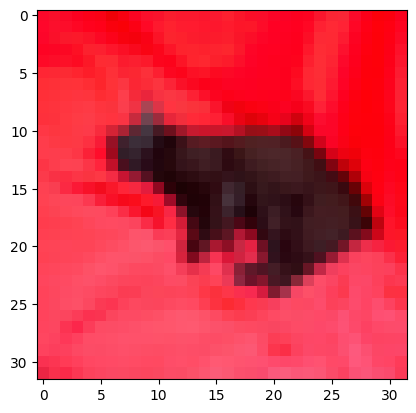

In [ ]:
plt.imshow(xtrain[21])
plt.show()

In [ ]:
ytrain[21]

array([3], dtype=uint8)

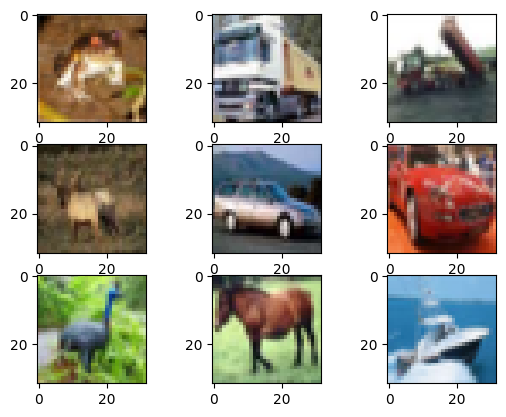

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i])
plt.show()

#check dtype and rescaling

In [ ]:
xtrain.dtype

dtype('uint8')

In [ ]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [ ]:
xtrain/=255
xtest/=255

#convert labels to categorical

In [ ]:
ytrain=utils.to_categorical(ytrain,10)

In [ ]:
ytest=utils.to_categorical(ytest,10)

In [ ]:
ytrain[21]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#model architecture

In [ ]:
model=Sequential()

#**Building a Model**

In [ ]:
model.add(Convolution2D(36,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

#**Compiling Model**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 36)        1008      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 36)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 36)        11700     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 36)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 36)          11700     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 36)          0

#visualize net

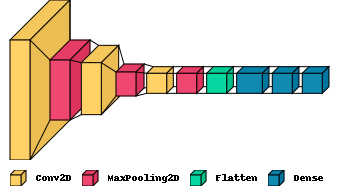

In [ ]:
visualkeras.layered_view(model,legend=True)

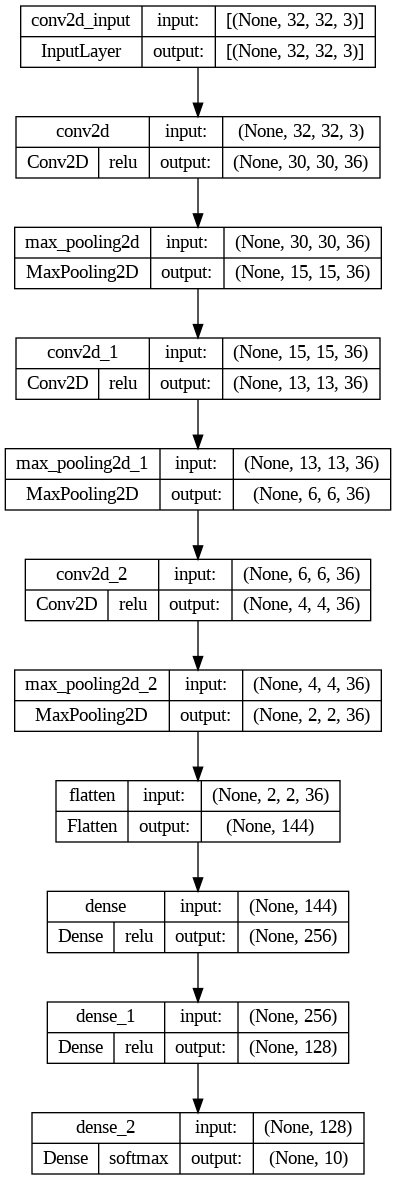

In [ ]:
plot_model(model,show_shapes=True,show_dtype=False,to_file="CNN-cifar10.png",show_layer_names=True,expand_nested=True,dpi=96,layer_range=None,show_layer_activations=True)

#fitting values to model

In [ ]:
model.fit(xtrain,ytrain,batch_size=100,epochs=25)

Epoch 1/25
500/500 [==============================] - 11s 5ms/step - loss: 1.6605 - accuracy: 0.3881
Epoch 2/25
500/500 [==============================] - 2s 5ms/step - loss: 1.3139 - accuracy: 0.5264
Epoch 3/25
500/500 [==============================] - 3s 5ms/step - loss: 1.1644 - accuracy: 0.5851
Epoch 4/25
500/500 [==============================] - 3s 6ms/step - loss: 1.0627 - accuracy: 0.6256
Epoch 5/25
500/500 [==============================] - 2s 5ms/step - loss: 0.9915 - accuracy: 0.6475
Epoch 6/25
500/500 [==============================] - 2s 5ms/step - loss: 0.9310 - accuracy: 0.6728
Epoch 7/25
500/500 [==============================] - 2s 5ms/step - loss: 0.8801 - accuracy: 0.6890
Epoch 8/25
500/500 [==============================] - 3s 5ms/step - loss: 0.8389 - accuracy: 0.7039
Epoch 9/25
500/500 [==============================] - 3s 6ms/step - loss: 0.8017 - accuracy: 0.7164
Epoch 10/25
500/500 [==============================] - 2s 5ms/step - loss: 0.7656 - accuracy: 0.730

#model prediction

In [ ]:
res=model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.0353 - accuracy: 0.7059


In [ ]:
print("loss , accuracy : ",res)

loss , accuracy :  [1.0353399515151978, 0.7059000134468079]


In [ ]:
y_pred=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


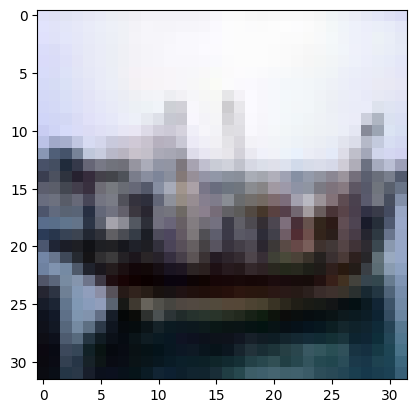

In [ ]:
plt.imshow(xtest[18])

In [ ]:
np.argmax(y_pred[18])

8

In [ ]:
np.argmax(ytest[18])

8

#Plotting actual vs predicted values

In [ ]:
import plotly.express as px
import pandas as pd
index= len(ytest)
df=pd.DataFrame(columns=['actual','predicted'], dtype=int)
for i in range(index):
  actual=np.argmax(ytest[i])
  predicted=np.argmax(y_pred[i])
  temp= pd.DataFrame({'actual': [actual], 'predicted': [predicted]})
  df = pd.concat([df, temp], ignore_index=True)
fig = px.scatter(df, x="actual", y="predicted", trendline="ols")
fig.show()


#2.PLOTTING MODEL with *INPUT 1750, 3 LAYERS HIDDEN AND 37 AS OUTPUT*

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1750,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(37, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               896512    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 37)                2405      
                                                                 
Total params: 1046693 (3.99 MB)
Trainable params: 1046693 (3.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


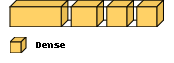

In [ ]:
visualkeras.layered_view(model, legend=True)

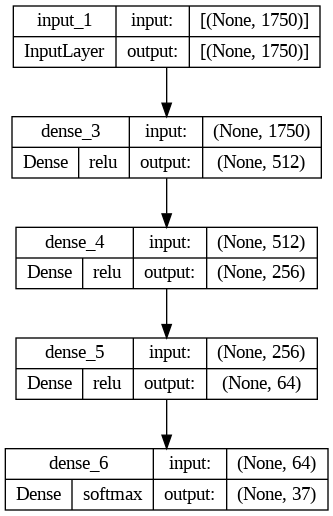

In [ ]:
plot_model(model,show_shapes=True,show_dtype=False,to_file="network.png",show_layer_names=True,expand_nested=True,dpi=96,layer_range=None,show_layer_activations=True)